# EDA KickStarter


**Objectif : Prédire le succès d'un projet Kickstarter**

Vous êtes datascientist chez [**Kickstarter**](https://www.kickstarter.com/), une plate-forme de _crowdfunding_. Vous souhaitez prédire la réussite ou non d'un projet . Avant de créer votre classifieur, vous entreprenez de faire une analyse préparatoire des données (EDA) pour avoir une meilleure intuition sur ces dernières.

Vous avez accès à toutes les ressources que vous souhaitez (cheatsheet, internet, etc.). N'hésitez pas à en faire _bon usage_.

Pensez à bien organiser votre notebook, à annoter vos graphiques et à les commenter judicieusement. Parmis les critères de notation :
- savoir charger un dataset,
- analyse des valeurs manquantes et dupliquées,
- analyse des outliers,
- analyse univariée,
- analyse multivariée,
- ainsi que toute analyse qui vous semble judicieuse pour prédire le succès d’un projet Kickstarter.

## Rendu

Vous rendrez votre Jupyter Notebook via [**Github**](https://github.com/). Pour cela créez un nouveau dépôt (repository) nommé `EDA2018` et uploadez le notebook **seul** sur ce dépôt. Ensuite, envoyez le lien dans un mail aux adresses suivantes :

- `alain.demenet@gmail.com`
- `florent.pietot@gmail.com`

Ajoutez en **pièce jointe** votre **notebook zippé** (afin d'avoir une double sauvegarde de votre travail et pour éviter tout problème éventuel).

## Description du dataset

Le dataset `dataset.csv` est un instantané du site en janvier 2018 :

Colonne | Description
------- | -------
**ID** | internal kickstarter id
**name** | name of project - a project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films
**category** | category
**main_category** | category of campaign
**currency** | currency used to support
**deadline** | deadline for crowdfunding
**goal** | fundraising goal - the funding goal is the amount of money that a creator needs to complete their project
**launched** | date launched
**pledged** | pledged amount in the project currency
**state** | current condition the project is in
**backers** | number of backers
**country** | country pledged from
**usd pledged** | amount of money pledged in USD (conversion made by Kickstarter)
**usd_pledged_real** | amount of money pledged in USD (conversion made by fixer.io api)
**usd_goal_real** | goal amount in USD (conversion made by fixer.io api)

**Bon courage !**

## Import des librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':(18,9)})

## 1. Découverte des données

In [2]:
data = pd.read_csv('dataset.csv', index_col=0)

In [3]:
# Affichage des 5 premières lignes du dataset
data.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
# Affichage des 5 dernières lignes du dataset
data.tail()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [5]:
data.columns.tolist()

['name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real']

Il y'a 14 variables dans ce dataset

In [6]:
# Affichage des types de chaque colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 31.8+ MB


In [7]:
print("Le dataset comporte {} samples et {} variables.".format(data.shape[0], data.shape[1]))

Le dataset comporte 378661 samples et 14 variables.


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
goal,378661.0,49080.791521,1.183391e+06,0.01,2000.00,5200.00,16000.00,1.000000e+08
pledged,378661.0,9682.979339,9.563601e+04,0.00,30.00,620.00,4076.00,2.033899e+07
backers,378661.0,105.617476,9.071850e+02,0.00,2.00,12.00,56.00,2.193820e+05
usd pledged,374864.0,7036.728867,7.863975e+04,0.00,16.98,394.72,3034.09,2.033899e+07
usd_pledged_real,378661.0,9058.924074,9.097334e+04,0.00,31.00,624.33,4050.00,2.033899e+07
usd_goal_real,378661.0,45454.401465,1.152950e+06,0.01,2000.00,5500.00,15500.00,1.663614e+08


## 2. Analyses des valeurs manquantes ou dupliquées
### Analyse des valeurs dupliquées

In [9]:
data.duplicated().sum()

0

Nous n'avons pas de valeurs dupliquées

### Analyse des valeurs manquantes

On compte maintenant le nombre de valeurs manquantes dans chaque colonne

In [10]:
data.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Nous avons 3797 valeurs manquantes pour la colonne "usd pledged"

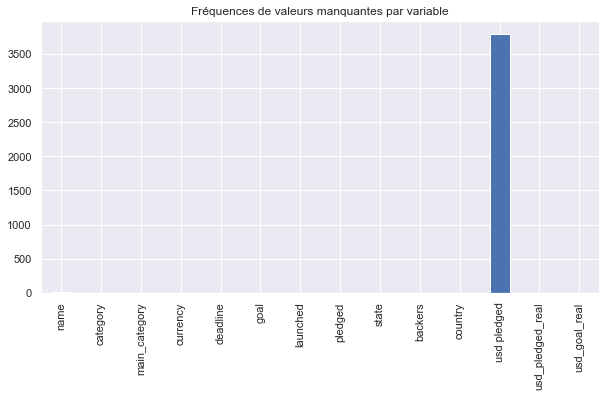

In [11]:
data.isna().sum().plot.bar(
    title='Fréquences de valeurs manquantes par variable',
    figsize=(10,5)
)

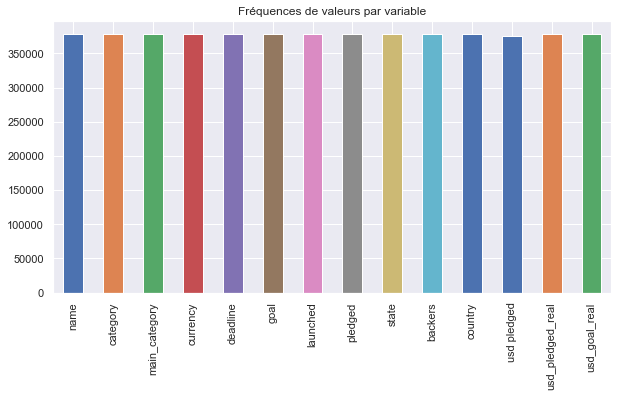

In [12]:
data.count().plot.bar(
    title='Fréquences de valeurs par variable',
    figsize=(10,5)
)

On remarque que la conversion des dons en dollars américains est manquant dans de nombreuses lignes du dataset ( 3797 lignes n'ont pas cette donnée). Cependant la proportion est faible si on regarde le nombre de valeurs manquantes par rapport au nombre de valeurs totales.

Il manque également 4 noms mais c'est très peu. Je doute que ces noms auront une influence sur le résultat de l'EDA, les lignes au nom manquant ne seront pas supprimés

In [13]:
data[data["usd pledged"].isna()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00


On remarque également que ces colonnes ont également leur status (Terminé, en cours, ...) non défini

In [14]:
data[data["state"] == "undefined"]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00


In [15]:
data[data["state"] == "undefined"]['state'].count()

3562

In [16]:
undef_state_percent = data[data["state"] == "undefined"]['state'].count() / len(data)
print("Il y'a {} % de statuts non définis ce qui est très peu".format(undef_state_percent))

Il y'a 0.00940683091208231 % de statuts non définis ce qui est très peu


La encore, cela ne me semble pas être si dérangeant que cela de ne pas avoir le statut d'un projet. Plutôt que de supprimer ces lignes, nous pourrions les garder afin d'avoir plus de précisions sur les dons. 

## 3. Outliers

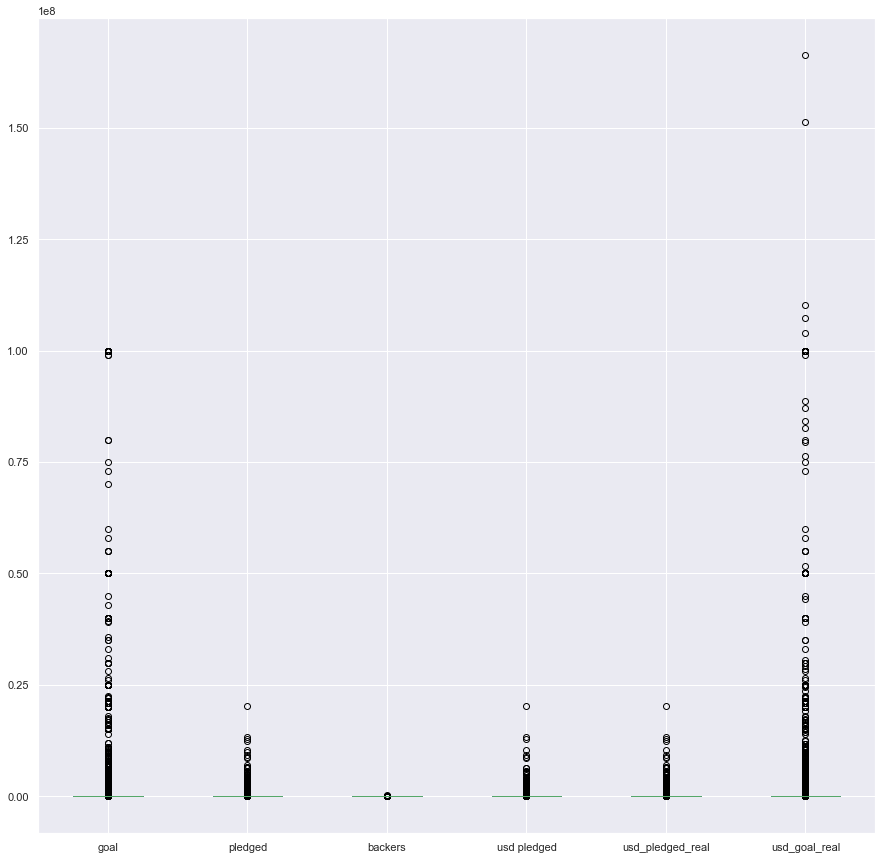

In [17]:
data.boxplot(
    figsize=(15,15)
)

Ce boxplot, cumulé avec les infos de l'analyse des données ci-dessus (voir le tableau data.describe().T) montre la grande partie des dons se situent **en dessous de 16000 dollars américains** mais certaines demandes atteignent des sommes astronomiques (**au dela des 100 000 000 de dollars américains**), ce que montre ce boxplot dont on ne distingue pas les boites

Ces données restent tout de même pertinentes et pourraient être intéréssantes pour prédire le succès d'un projet Kickstarter, il me semble inutile de les supprimer.

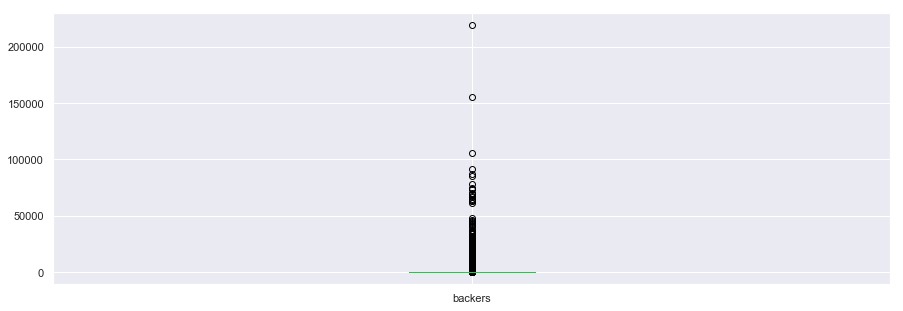

In [18]:
data.boxplot(
    ['backers'],
    figsize=(15,5)
)

De même pour les backers, **dans 75% des cas, ils sont moins de 60 backers** à effectuer une donation si on regarde le tableau lors de l'analyse des données mais pour certains projets, **on peu atteindre plusieurs milliers de donateurs selon ce graphique**

## 4. Analyse univariée

Text(0.5, 1.0, 'Nombre de projets classifiés par statut attribué')

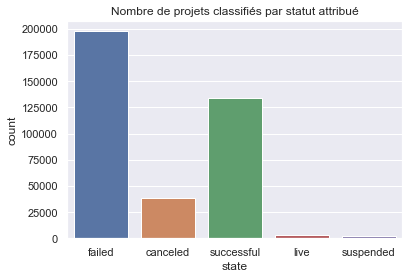

In [19]:
# On supprime les valeurs non définies, peu pertinentes ici.
sns.countplot(data[data['state'] != 'undefined']['state']).set_title('Nombre de projets classifiés par statut attribué')

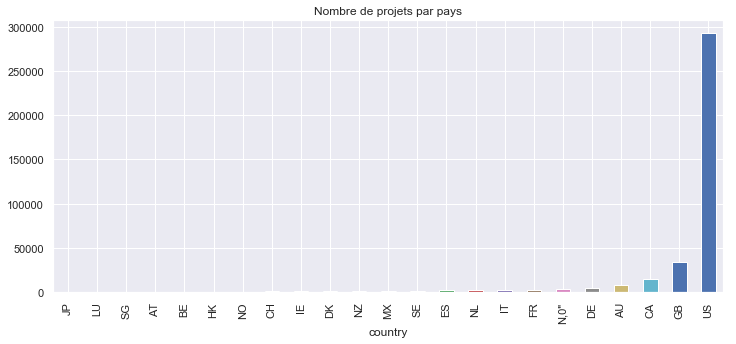

In [20]:
data.groupby('country')['country'].count().sort_values().plot.bar(title="Nombre de projets par pays",figsize=(12,5))

Les projets sont majoritairement déposés par des américains

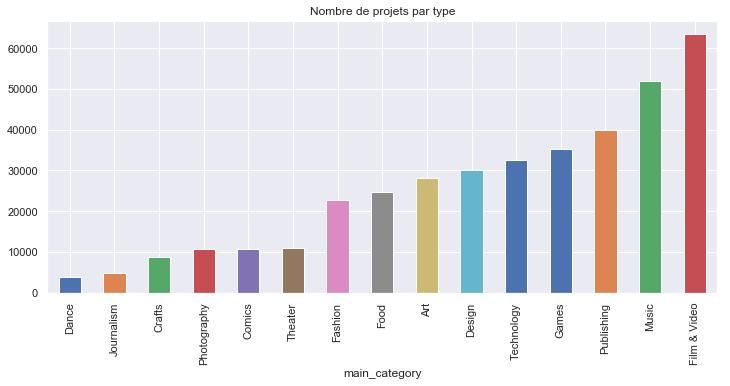

In [21]:
data.groupby('main_category')['main_category'].count().sort_values().plot.bar(title="Nombre de projets par type",figsize=(12,5))

In [22]:
# Converti les dates en objet date
format_ymdhms = '%Y-%m-%d %H:%M:%S'
format_ymd = '%Y-%m-%d'

data['launched'] = pd.to_datetime(data['launched'], format=format_ymdhms)
data['deadline'] = pd.to_datetime(data['deadline'], format=format_ymd)

data['period'] = data['deadline'] - data['launched']
data['period'] = data['period'].dt.days

In [23]:
data['period'].mean()

33.48112163650336

La durée de récolte est en moyenne de **33 jours**

In [24]:
data[data['pledged'] == data['pledged'].max()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,period
ID,,,,,,,,,,,,,,,
1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.0,31


La plus grande récolte : **20 338 986.27 dollars américain**

## 5. Analyse multivariée

### Corréllation entre les différentes valeurs

Text(0.5, 1.0, 'Corrélation entre les différentes propriétés')

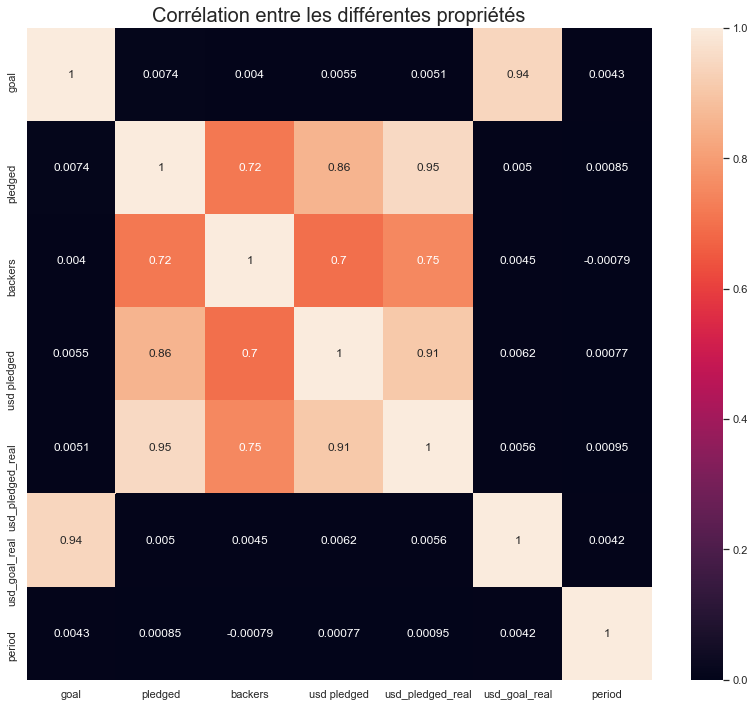

In [26]:
# Change la taille
sns.set(rc={'figure.figsize':(14,12)})

ax = sns.heatmap(data.corr(), annot=True)
ax.set_title('Corrélation entre les différentes propriétés', fontsize=20)

Sur cette heatmap, le **nombre de backers** semble avoir un lien fort avec le **montant total des donations (pledged)** récupérés ce qui est en partie logique

Text(0.5, 1.0, 'Nombre de backers par statut')

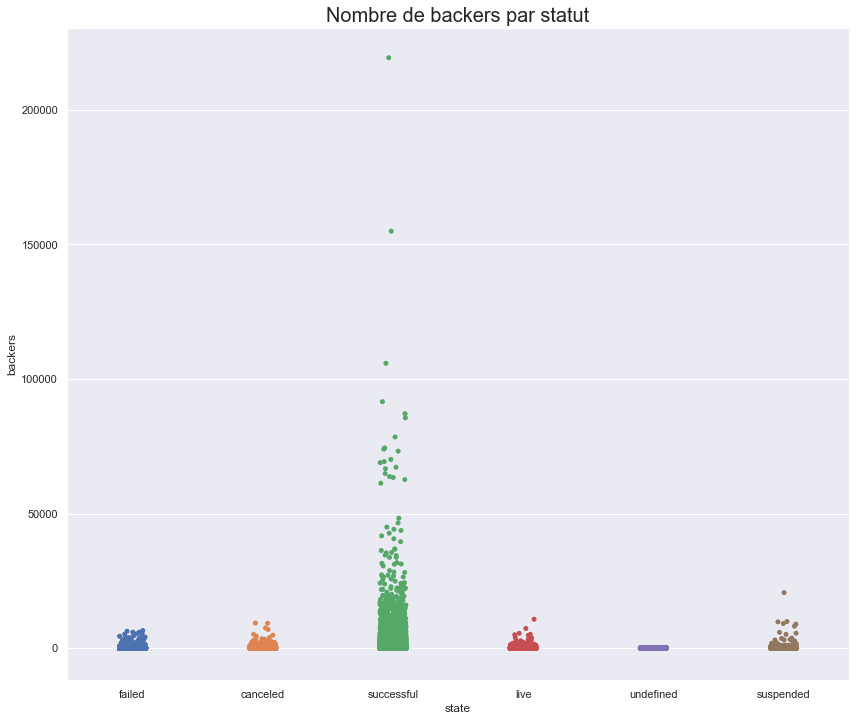

In [62]:
ax = sns.stripplot(
    'state',
    'backers',
    data=data
)

ax.set_title('Nombre de backers par statut', fontsize=20)

Sur ce graphique, on remarque que **les projets concretisés (successful) ont eu plus de donateurs (backers)**

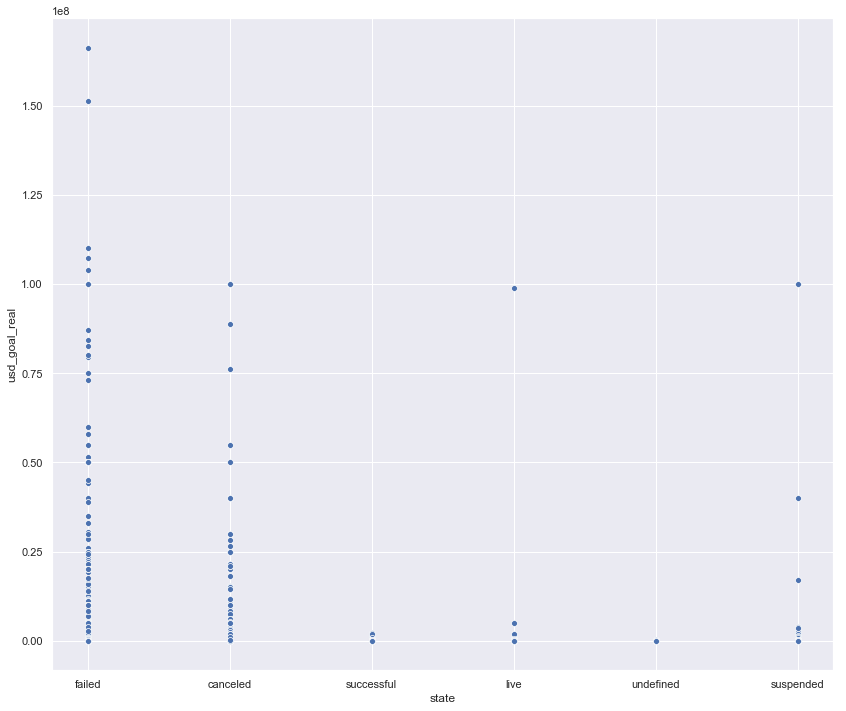

In [60]:
ax = sns.scatterplot(
    'state',
    'usd_goal_real',
    data=data
)

Ce graphique montre clairement que **les campagnes demandant les plus grosses levées de fonds ne réusissent jamais.**

Text(0, 0.5, 'Durée de la levée de fond en moyenne')

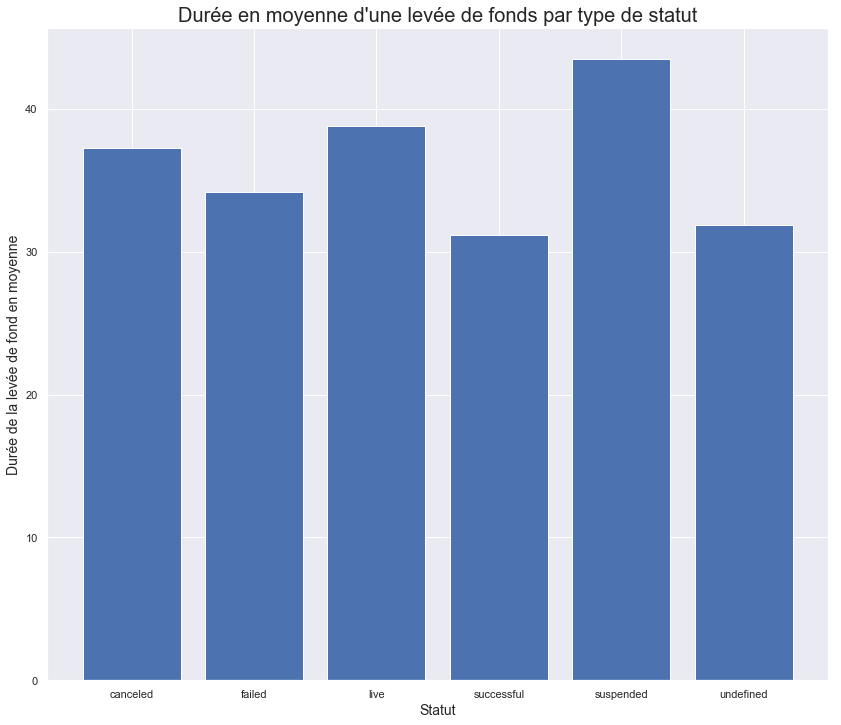

In [64]:
# ax = sns.barplot(data['state'], data['period'])
fig, ax = plt.subplots()

x = categories.columns.tolist()
y = data.groupby('state')['period'].mean().tolist()

ax.bar(x, y)
ax.set_title("Durée en moyenne d'une levée de fonds par type de statut", fontsize=20)
ax.set_xlabel("Statut", fontsize=14)
ax.set_ylabel("Durée de la levée de fond en moyenne", fontsize=14)


On remarque en moyenne que les projets ayant atteint le statut "Successful" ne dépasse pas les 32 jours. **Les levées de fond ont une durée plus courte pour les projets qui ont atteint le statut "Successful"**

Ci-dessous, on remarque que les plus grandes levées se font entre 0 et 60 jours. On remarque un pic particulièrement aux alentours des 30 jours

Text(0.5, 1.0, 'Levées de fonds en fonction de la durée')

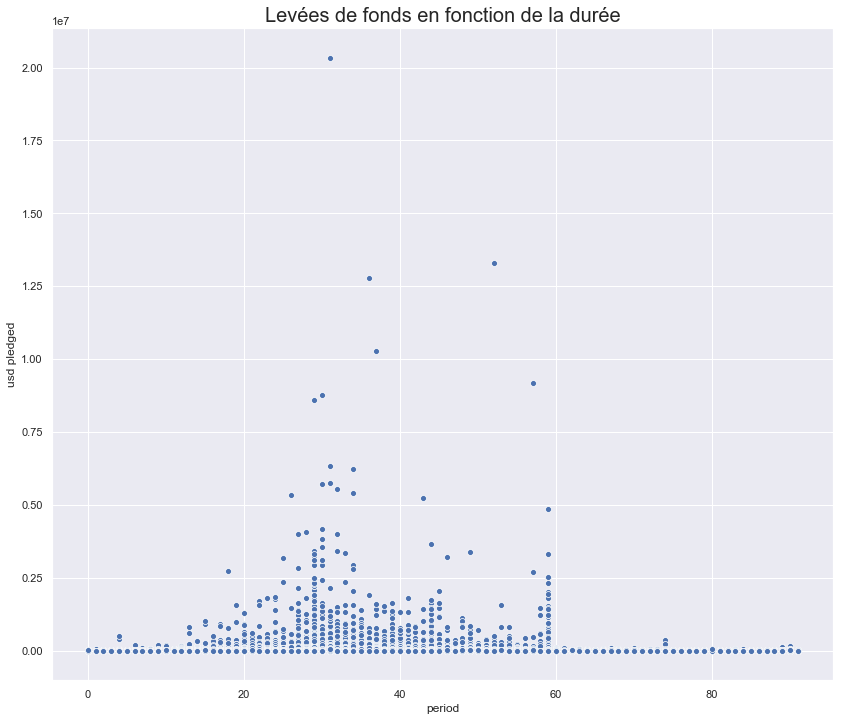

In [75]:
# Suppression des valeurs au dela de 100 jours car cela compacte le graphique
filtered = data[data["period"] < 100]
ax = sns.scatterplot(x="period", y="usd pledged", data=filtered)
ax.set_title("Levées de fonds en fonction de la durée", fontsize=20)

### Catégories principales et catégories remportant le plus de succès

In [76]:
main_categories = data.pivot_table("pledged", index="main_category", columns="state", aggfunc='count')
main_categories["successful"].sort_values(ascending=False)

main_category
Music           24197.0
Film & Video    23623.0
Games           12518.0
Publishing      12300.0
Art             11510.0
Design          10550.0
Theater          6534.0
Technology       6434.0
Food             6085.0
Comics           5842.0
Fashion          5593.0
Photography      3305.0
Dance            2338.0
Crafts           2115.0
Journalism       1012.0
Name: successful, dtype: float64

In [78]:
categories = data.pivot_table("pledged", index="category", columns="state", aggfunc='count')
categories["successful"].sort_values(ascending=False)[:20]

category
Product Design      7962.0
Tabletop Games      7866.0
Shorts              6673.0
Music               6432.0
Documentary         5924.0
Theater             4405.0
Indie Rock          3618.0
Rock                3500.0
Art                 3385.0
Food                3297.0
Film & Video        3070.0
Country & Folk      2812.0
Comics              2506.0
Video Games         2386.0
Children's Books    2348.0
Fiction             2233.0
Nonfiction          2230.0
Fashion             2188.0
Narrative Film      2013.0
Photography         1876.0
Name: successful, dtype: float64

Ce tableau montre que les catégories musiques et jeux vidéos ont plus de succès que les autres.

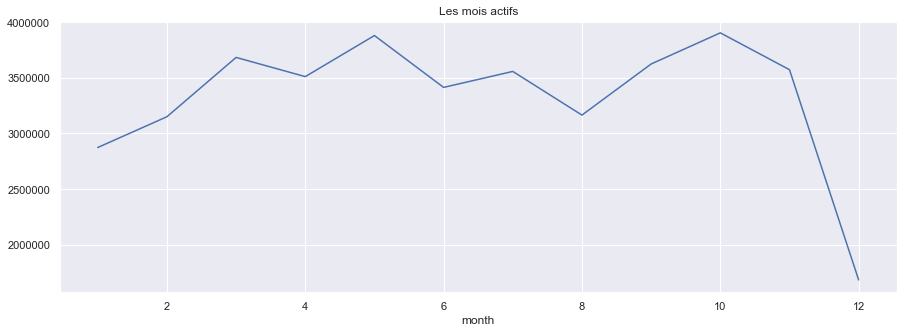

In [82]:
# Récupération du mois
data['month'] = data['launched'].dt.month

# Somme des backers par mois
backers_activity = data.groupby('month').aggregate(lambda x:x.sum())['backers']
backers_activity.plot(figsize=(15, 5), title='Les mois actifs')



Le mois de décembre ne semblent pas être propice pour démarrer une levée de fond. L'activité des backers s'effondre et remonte qu'en Mars. En Aout, on observe une légère chute de l'activité.

## Conclusion

### Plus il y'a de backers, plus il semble avoir de chances que le projet réussisse sa levée de fonds

Les projets sont plus souvent concrétisés lorsqu'il y'a un nombre importants de backers (donateurs).

### Les projets demandant de grosses levées de fonds n'aboutissent jamais

Les levées de fonds demandant des millions de dollars aboutissent rarement. Les rares projets demandant plus de 100 millions de dollars n'ont jamais aboutis

### Les projets récupèrent de plus grandes sommes d'argent si ils se font sur des temps cours

Environ 30 jours. Les levées de fonds s'étalant sur plus de 100 jours récupèrent bien souvent moins d'argent

### Les mois d'été et d'hiver ne sont pas les meilleurs moments pour commencer une levée de fonds

Particulièrement le mois de décembre et le mois d'août.

### Les catégories musiques et jeux vidéos ont plus de succès